In [2]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob

In [30]:
climate_path = "../exp_climate_gan/"
climate_files = sorted(glob(climate_path + "*.nc"))
climate_gan_x = []
for climate_file in climate_files:
    climate_obj = xr.open_dataset(climate_file)
    climate_gan_x.append(climate_obj["x"].values)
    climate_obj.close()
    del climate_obj

In [31]:
climate_path = "../exp_climate_poly/"
climate_files = sorted(glob(climate_path + "*.nc"))
climate_poly_x = []
for climate_file in climate_files:
    climate_obj = xr.open_dataset(climate_file)
    climate_poly_x.append(climate_obj["x"].values)
    climate_obj.close()
    del climate_obj

In [32]:
lorenz_data = xr.open_dataset("../exp_u/lorenz_output.nc")
print(lorenz_data.variables.keys())
x_vals = lorenz_data["lorenz_x"].values
y_vals = lorenz_data["lorenz_y"].values
step_values = lorenz_data["step"].values
lorenz_data.close()
start_index = 1000000
l_start = np.where(step_values == start_index)[0][0]
l_end = step_index + 60000

KeysView(Frozen(OrderedDict([('time', <xarray.IndexVariable 'time' (time: 399600)>
array([    2.   ,     2.005,     2.01 , ...,  1999.985,  1999.99 ,  1999.995])), ('y', <xarray.IndexVariable 'y' (y: 256)>
array([  0,   1,   2, ..., 253, 254, 255])), ('x', <xarray.IndexVariable 'x' (x: 8)>
array([0, 1, 2, 3, 4, 5, 6, 7])), ('step', <xarray.Variable (time: 399600)>
[399600 values with dtype=int64]
Attributes:
    long_name:  integration step
    units:      ), ('lorenz_y', <xarray.Variable (time: 399600, y: 256)>
[102297600 values with dtype=float64]
Attributes:
    long_name:  lorenz_y
    units:      ), ('lorenz_x', <xarray.Variable (time: 399600, x: 8)>
[3196800 values with dtype=float64]
Attributes:
    long_name:  lorenz_x
    units:      )])))


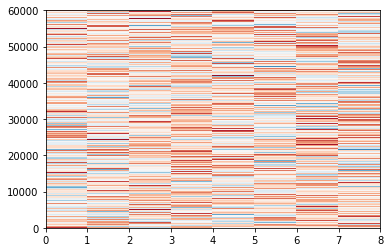

In [7]:
plt.pcolormesh(climate_x[2], vmin=-30, vmax=30, cmap="RdBu_r")

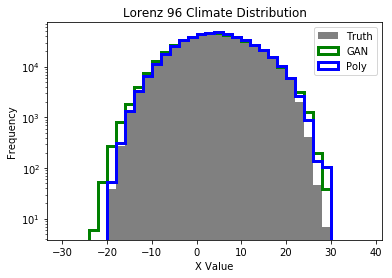

In [40]:
plt.figure(figsize=(6, 4))
c_bins = np.arange(-30, 40, 2)
plt.hist(x_vals[l_start:l_end].ravel(), bins=c_bins, color="gray", label="Truth")
plt.hist(climate_gan_x[0].ravel(), bins=c_bins, histtype="step", color="green", lw=3, label="GAN")
plt.hist(climate_poly_x[0].ravel(), bins=c_bins, histtype="step", color="blue", lw=3, label="Poly")
plt.gca().set_yscale("log")
plt.ylabel("Frequency")
plt.xlabel("X Value")
plt.title("Lorenz 96 Climate Distribution")
plt.legend()